<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/005_pytorch_workflows_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import torch
from torch import nn # (https://pytorch.org/docs/stable/nn.html)
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

print("Intro to Pytorch Workflow")
print(torch.__version__)

Intro to Pytorch Workflow
2.0.1+cu118


In [88]:
# Build a Model
# Our First Model

# PyTorch has four (give or take) essential modules you can use to create almost
# any kind of neural network you can imagine.

# They are torch.nn, torch.optim, torch.utils.data.Dataset and
# torch.utils.data.DataLoader. For now, we'll focus on the first two and get to
# the other two later (though you may be able to guess what they do).

# How Gradient Descent works? Watch: https://www.youtube.com/watch?v=IHZwWFHWa-w
# What is Backpropagation? Watch: https://www.youtube.com/watch?v=Ilg3gGewQ5U

class LinearRegressionModel(nn.Module): # nn.Module is NN lego block
  def __init__(self):
    super().__init__()

    # FYI, we don't necessarily have to start with random/unknown params
    self.weights = nn.Parameter(torch.randn(1, # start with random weight
                                            dtype=torch.float),
                                # update weights with gradient descent
                                # pytorch will track gradient of this specific
                                # parameter for use with torch.autograd
                                            requires_grad=True)

    # nn.Parameter when used as part of a module, becomes
    # part of Module.Parameters iterator

    self.bias = nn.Parameter(torch.randn(1, # start with random bias
                                         dtype=torch.float),
                             # update weights with gradient descent
                             requires_grad=True)

  # forward defines the model computation
  # any class that inherits from nn.Module needs to implement the forward method
  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias # y = mX + b (linear regression)

In [89]:
# Check PyTorch Cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

In [90]:
# Almost everything in a PyTorch neural network comes from torch.nn,

# nn.Module contains the larger building blocks (layers)
# nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
# forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
# torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

In [91]:
# What happens if create an instance of our model class?

# Check contents of PyTorch model

# For sake of learning, Create a random seed
torch.manual_seed(42) # to make sure the internal random numbers generated for 'weights' and 'bias' are the same everytime (only for learning purpose)

# create a model
model_one = LinearRegressionModel()

# check out parameters
model_one

LinearRegressionModel()

In [92]:
model_one.parameters

<bound method Module.parameters of LinearRegressionModel()>

In [93]:
list(model_one.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [94]:
# Now try the above code commenting torch.manual_seed(42)
# This will how actually there is a random value generated by the model everytime to start off


In [95]:
# List named parameters
model_one.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [96]:
# In Reality, the model starts off with some random values like this
# and use gradient descent to get to the target value

# Lets assume a target value for our parameters
weight = 0.7
bias = 0.3



# Let's recreate some dummy data that we created in last lesson as well
# To check how well does our model performs predicting

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Lets also redefine plot prediction function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



In [97]:
# the work of the model should be to go from random value to the above 2 values use gradient decent and back propagation

In [98]:
# Making predictions using torch.inference_mode()

# Disable all gradient related information. Runs faster since we are not training the model, we are just doing inference
# To test, check the output of y_predictions = model_one(X_test) without inference mode
with torch.inference_mode():
  y_predictions = model_one(X_test)


# Learn more about inference mode here: https://twitter.com/PyTorch/status/1437838231505096708?lang=en

In [99]:
# Lets check predictions

print(f"Number of testing samples = { len(X_test) }")
print(f"Number of predictions = { len(y_predictions) }")

Number of testing samples = 10
Number of predictions = 10


In [100]:
print(f"Predictions= { y_predictions }")

Predictions= tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


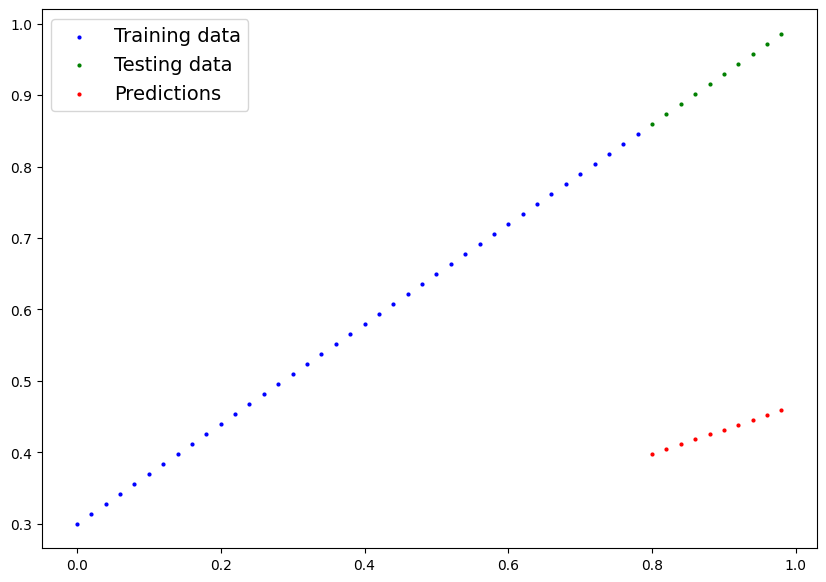

In [101]:
plot_predictions(X_train,
                 y_train,
                 X_test,
                 y_test,
                 y_predictions)

In [102]:
# The whole idea of training is to start from random and get as closer to the actual result
# by continuousing calculating how poor model predictions are by using a Loss Function

# More on Loss Functions here https://pytorch.org/docs/stable/nn.html#loss-functions
# Loss Function also called Cost function or criterion

# Loss function tries to improve the prediction by using something called Optimizer

# Optimizer: Takes into account the loss of a model and adjusts the model's paramters (e.g. weights and bias in our case)
# to improve the loss function. More here: https://pytorch.org/docs/stable/optim.html

# Which params we have in our model? Check:
model_one.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [103]:
# Next, we need now need 1/ Training Loop 2/ Testing Loop

In [104]:
# Setting Up A Loss Function & Optimizer

# In Pytorch:
# L1 Loss = Mean Absolute Error
# L2 Loss = Mean Square Error
# and there are many others, see more here: https://pytorch.org/docs/stable/nn.html#loss-functions

# If we write L1 loss ourselves, we could write:
# MAE_loss = torch.mean(torch.abs(y_predictions - y_test))

# In PyTorch, we can use builtin one MAE_loss = torch.nn.L1Loss

# Setup a loss function
loss_func = nn.L1Loss() # Loss function measures how wrong our model is

# Setup an optimizer (SGD = Stocastic Gradient Descent)
# Optimizer adjust our model parameters no matter there is
# 2 params (like weight and bias in our case) or there are millions or even billions of parameters
optimizer_func = torch.optim.SGD(model_one.parameters(),
                                 lr=0.01) # Learning Rate (its a hyperparameter) play with 0.001 as well

# Parameters are values model sets itself
# Hyperparameter are parameters we set oursevlves (as a Data Scientist or ML Engineer)
# Technically we can set `lr` to whatever value, this comes from a lot of trail and error
# The smaller the learning rate, the smaller the change in parameter to improve it

In [105]:
# Question: Which loss functiona and which optimizer to use for which problem?
# Answer: There are specific loss function and optimizers for specific type of problems
# For example, there are specific loss functions and optimizers for regression vs classification task

In [106]:
# Building a Training Loop (and testing loop) in Pytorch
# Write now, we are doing all step by step, later we will write functions to do it

# Things to do:
# 0. Loop through data
# 1. Forward Pass (moving data through forward() function) to make predictions on data aka forward propagation
# 2. Optimizer zero grad
# 3. Loss backward (Backpropgation) - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss
# 4. Optimizer step (Gradient Descent) - use the optimizer to adjust our model's parameters to try and improve the loss

In [159]:
# An epoch is one loop through the data (this is also a hyperparameter)
epochs = 1 # 100

# Step.0: Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_one.train() # train mode in Pytorch sets all parameters that require gradients

  # Step.1: Forward pass
  # Behind the scene, pytorch sets the model meta data and will pass all data to forward() function
  y_predictions = model_one(X_train)

  # Step.2: Calculate loss
  loss = loss_func(y_predictions, y_train)
  print(f"Loss = { loss }")

  # Step.3: Optimizer zero grad
  optimizer_func.zero_grad() # start fresh every loop

  # Step.4: Peform Backpropagation
  # Internally,  pytorhc computes the gradient of every parameter with requires_grad = True
  # In our case, we set requires_grad = True for both weight and bias
  # Torch does it via autograd, read more here https://pytorch.org/docs/stable/autograd.html
  loss.backward()

  # Step.5: Step the optimizer (Peform Gradient Descent)
  # Progress/step the optimizer
  # By default how optimizer changes will accumulate through the loop so
  # so we have to zero them above in step.3 for next iteration

  # step() accumlates the value we have to update, why it accumlates
  # is probably for faster computation (this is under the hood pytorch)
  optimizer_func.step()

  # Testing
  model_one.eval()

model_one.state_dict()

# Run the above code multiple times to continuously see the model learning (and see the loss function going down)
# You can also increase epoch to some big number to run all iterations at once

# After many many iterations, the weight and bias should get closer and closer to the actual value of weight = 0.7 and bias = 0.3

Loss = 0.009686763398349285


OrderedDict([('weights', tensor([0.6534])), ('bias', tensor([0.3193]))])

In [166]:
with torch.inference_mode():
  y_predictions_new = model_one(X_test)
# I got this error RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
# Read https://stackoverflow.com/questions/55466298/pytorch-cant-call-numpy-on-variable-that-requires-grad-use-var-detach-num

In [170]:
# after traiing
model_one.state_dict()

OrderedDict([('weights', tensor([0.6534])), ('bias', tensor([0.3193]))])

In [169]:
# actual
weight, bias

(0.7, 0.3)

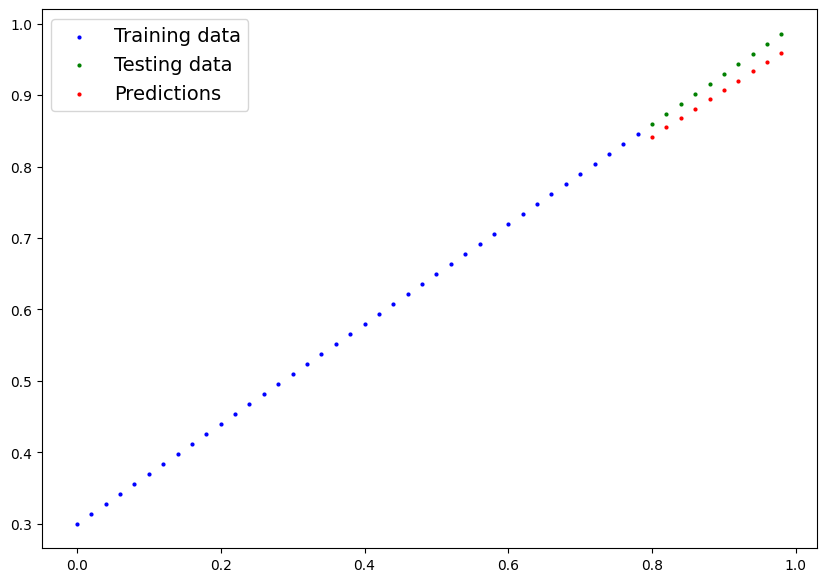

In [171]:
plot_predictions(predictions = y_predictions_new);